###Machine learning in python

Exercise 2 of Andrew Ng's coursera course

Logistic regression

In [1]:
# show plots in the notebook
%matplotlib inline
import matplotlib.pyplot as plt
from numpy import loadtxt, zeros, where, append, array, exp, dot, \
    transpose, reshape, log, ones, linspace, matrix, random, \
    meshgrid, arange, hstack
from scipy.optimize import minimize, fmin

#load and clean the dataset
data = loadtxt('ex2data1.txt', delimiter=',')

x_raw = data[:, 0:2]
m = x_raw.shape[0]
n = x_raw.shape[1]
X = ones((m,n+1))
X[:,1:] = x_raw
X = X.T
y = data[:, 2].reshape(1, m)
theta = array([[0,0,0]]).T

In [2]:
def sigmoid(X):
    """
    Compute the sigmoid function
    """
    denominator = 1.0 + exp(-1.0 * X)
    return 1.0 / denominator


In [3]:
def cost_function(theta,X,y): 
    """
    computes cost given predicted and actual values
    inputs:
        theta: n+1 x 1 vector
        X: n+1 x m matrix
        y: m x 1 matrix
    """
    
    J = (-1./m) * (((log(sigmoid(theta.T.dot(X)))).dot(y.T)) 
                   + log(1-sigmoid(theta.T.dot(X))).dot((1-y).T))
    return J[0]


In [4]:
cost_function(theta,X,y)

array([ 0.69314718])

In [5]:
theta_opt = fmin(cost_function, theta, args=(X, y)).reshape(n+1, 1)

Optimization terminated successfully.
         Current function value: 0.203498
         Iterations: 157
         Function evaluations: 287


In [6]:
def fitted_line(theta,x_1):
    # generates fitted line separating admitted from non admitted
    return (1./theta[2]) * (0.5 - theta[0] - theta[1]*x_1)

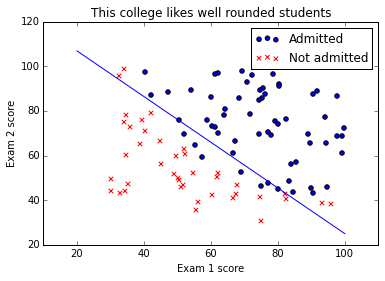

In [7]:
x_1_domain = linspace(20,100,81)
pos = where(y[0]==1)
neg = where(y[0]==0)
plt.scatter(X[1, pos], X[2, pos], marker='o', c='b', label='Admitted')
plt.scatter(X[1, neg], X[2, neg], marker='x', c='r', label='Not admitted')
plt.plot(x_1_domain, fitted_line(theta_opt, x_1_domain))
plt.xlabel('Exam 1 score')
plt.ylabel('Exam 2 score')
plt.title('This college likes well rounded students')
plt.legend()
plt.show()

In [8]:
Z = theta_opt.T.dot(X)
pr = sigmoid(Z[0])
prediction = (pr > 0.5).astype(int)
accuracy = sum(y[0] == prediction) / float(len(prediction))
print 'The accuracy of the manual logistic regression model is', float(accuracy)
print 'The accuracy of the scikit-learn logistic model is', 0.91

The accuracy of the manual logistic regression model is 0.89
The accuracy of the scikit-learn logistic model is 0.91


In [9]:
## part two

#load the dataset
data2 = loadtxt('ex2data2.txt', delimiter=',')
x2_raw = data2[:, 0:2]
m2 = x2_raw.shape[0]
n2 = x2_raw.shape[1]
X2 = ones((m2,n2+1))
X2[:,1:] = x2_raw
X2 = X2.T
y2 = array(data2[:, 2]).reshape(1,m2)
theta = array([[0,0,0]]).T

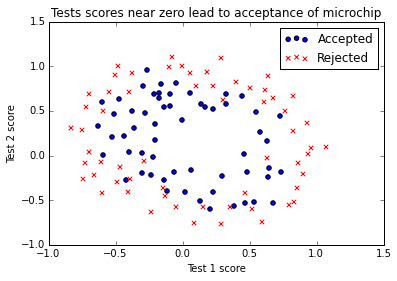

In [10]:
pos = where(y2[0]==1)
neg = where(y2[0]==0)
plt.scatter(X2[1, pos], X2[2, pos], marker='o', c='b', label='Accepted')
plt.scatter(X2[1, neg], X2[2, neg], marker='x', c='r', label='Rejected')
plt.xlabel('Test 1 score')
plt.ylabel('Test 2 score')
plt.title('Tests scores near zero lead to acceptance of microchip')
plt.legend()
plt.show()

In [11]:
x1 = X2[1,:].reshape(m2, 1)
x2 = X2[2,:].reshape(m2, 1)

def map_feature(x1, x2, degree):
    # creates new variables (polynomials up to degree)
    new_data = []
    data = ones( (x1.shape[0], 1) )
    for i in range(1,degree+1):
        for j in range(0,i+1):
            var = (x1**(i-j)) * (x2**j)
            data   = hstack(( data, var ))
    return array(data).T

new_data = map_feature(x1, x2, 6)

In [12]:
def cost_function_reg(theta, lamda, X, y): 
    #computes cost given predicted and actual values
    z = theta.T.dot(X)
    J1 = (-1./m2) * (log(sigmoid(z)).dot(y.T) 
                    + log(1-sigmoid(z)).dot((1-y).T))
    J2 = (lamda/(2*m2)) * sum([t**2 for t in array(theta)]) 
    J = J1 + J2
    return float(J)

In [13]:
theta2 = array([0] * 28).reshape((28, 1))
lamda = 1.0
cost_function_reg(theta2, lamda, new_data, y2)

0.6931471805599453

In [14]:
"""
Z = theta_opt.T.dot(X)
pr = sigmoid(Z[0])
prediction = (pr > 0.5).astype(int)
accuracy = sum(y[0] == prediction) / float(len(prediction))
print 'The accuracy of the manual logistic regression model is', float(accuracy)
print 'The accuracy of the scikit-learn logistic model is', 0.91
"""

def logistic_reg(lamda):
    theta = random.uniform(-1, 1, 28).reshape(28, 1)
    theta_opt = minimize(cost_function_reg, theta, args=(lamda, new_data, y2), method='BFGS', options={"maxiter":500, "disp":True} ).x
    print ""
    theta_opt = theta_opt.reshape(28, 1)
    z = theta_opt.T.dot(new_data)
    pr = sigmoid(z)
    prediction = array((pr > 0.5).astype(int))
    accuracy = array((y2[0] == prediction).astype(int)).reshape(118,1)
    accuracy = sum(accuracy) / float(len(accuracy))
    print 'The accuracy of the manual logistic regression model is', float(accuracy)
    return theta_opt

In [15]:
def plot_boundary(theta, lamda):
    # plotting decision boundary
    # this site was a help: 
    # http://stackoverflow.com/questions/19054923/plot-decision-boundary-matplotlib/19055059#19055059

    # X - some data in 2dimensional np.array
    gridsize = 50
    x1_min, x1_max = X2[1, :].min() - 0.1, X2[1, :].max() + 0.1
    x2_min, x2_max = X2[2, :].min() - 0.1, X2[2, :].max() + 0.1
    xx1, xx2 = meshgrid(linspace(x1_min, x1_max, gridsize),
                     linspace(x2_min, x2_max, gridsize))

    # here "model" is your model's prediction (classification) function
    Z = map_feature(xx1.ravel().reshape(gridsize*gridsize, 1), xx2.ravel().reshape(gridsize*gridsize, 1), 6)
    Z = theta.T.dot(Z).reshape(xx1.shape)
    
    # Put the result into a color plot
    plt.contour(xx1, xx2, Z, cmap=plt.cm.Paired)
    plt.title('$\lambda$ = %f' % round(lamda,1))
    plt.scatter(X2[1, pos], X2[2, pos], marker='o', c='b', label='Accepted')
    plt.scatter(X2[1, neg], X2[2, neg], marker='x', c='r', label='Rejected')
    plt.xlabel('Microchip Test 1')
    plt.ylabel('Microchip Test 2')
    plt.legend(['y = 1', 'y = 0', 'Decision boundary'])
    plt.show()          

         Current function value: 0.248669
         Iterations: 478
         Function evaluations: 14922
         Gradient evaluations: 497

The accuracy of the manual logistic regression model is 0.881355932203


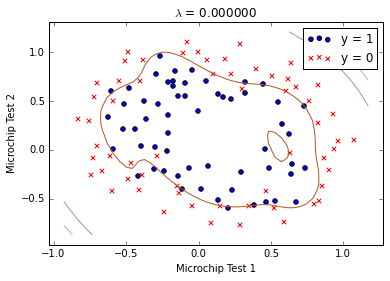

Optimization terminated successfully.
         Current function value: 0.535160
         Iterations: 50
         Function evaluations: 1560
         Gradient evaluations: 52

The accuracy of the manual logistic regression model is 0.822033898305


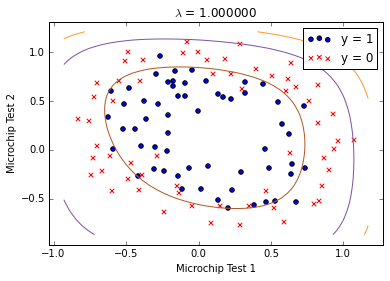

Optimization terminated successfully.
         Current function value: 0.679185
         Iterations: 8
         Function evaluations: 270
         Gradient evaluations: 9

The accuracy of the manual logistic regression model is 0.669491525424


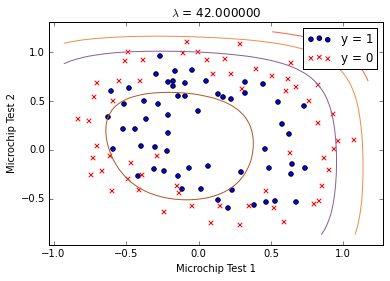

In [16]:
lam = [0.0, 1.0, 42.0]
for la in lam:
    theta = logistic_reg(la)
    plot_boundary(theta, la)